In [67]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import folium as fl
import wordcloud as wc
from wordcloud import STOPWORDS,WordCloud
%matplotlib inline
import collections

In [8]:
months = ['\\april','\\febrouary','\march']
months2 = ['febrouary','march','april']
files = ['\listings.csv','\listings0.csv']
# inputPath= r"C:\Users\myrto\Desktop\data"
inputPath= r"C:\Users\nikol\Desktop\dataMining_p1\data\data"
columnlist = ['id','zipcode','transit','bedrooms','beds','review_scores_rating','number_of_reviews','neighbourhood','name','latitude','longitude','last_review','instant_bookable','host_since','host_response_rate','host_identity_verified','host_has_profile_pic','first_review','description','city','cancellation_policy','bed_type','bathrooms','accommodates','amenities','room_type','property_type','price','availability_365','minimum_nights','host_id']
# monthDictionary = {'april':('')}

framelist = []
monthlist = []
i=0
for month in months:
    for file in files:
        tempfile = pd.read_csv(inputPath+month+file,index_col=False)
        tempframe = pd.DataFrame(data=tempfile)
        framelist.append(tempframe)
    for l in range(0,len(framelist)-1):
        train = framelist[0].combine_first(framelist[l+1])
    df = pd.DataFrame(data = train, columns=columnlist)
    df.insert(loc=len(df.columns),column='month_id',value=months2[i])
    monthlist.append(df)
    i=i+1

df = pd.concat(monthlist)
df.drop_duplicates(ignore_index=True,inplace=True)
df['price'] = df['price'].apply(lambda x: x.translate(str.maketrans({',':'','$':''})))
df['price'] = pd.to_numeric(df['price'])

df.to_csv("train.csv")


df.fillna(df.mean(),inplace=True)
df.fillna(method='backfill',inplace=True)
df.dropna()

count_nan = len(df)-df.count()
print(count_nan)
inplace=True

id                         0
zipcode                    0
transit                    3
bedrooms                   0
beds                       0
review_scores_rating       0
number_of_reviews          0
neighbourhood              9
name                       0
latitude                   0
longitude                  0
last_review               78
instant_bookable           0
host_since                 0
host_response_rate         1
host_identity_verified     0
host_has_profile_pic       0
first_review              78
description                0
city                       0
cancellation_policy        0
bed_type                   0
bathrooms                  0
accommodates               0
amenities                  0
room_type                  0
property_type              0
price                      0
availability_365           0
minimum_nights             0
host_id                    0
month_id                   0
dtype: int64


In [10]:
# 1
dt = df['room_type'].value_counts().head(1)
tempdf = DataFrame(data=dt)
tempdf 

,room_type
Entire home/apt,25530


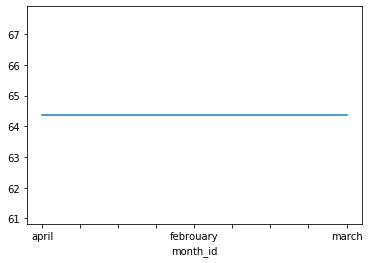

In [11]:
# 2

groupbymonth = df.groupby(by='month_id')
dfaverage = groupbymonth['price'].mean()
dfaverage.plot(x='per_month',y='price')


In [9]:
# groupbymonth = priceDf.groupby(by='month_id')
# dfaverage = groupbymonth['price'].mean()
# dfaverage.plot(x='per_month',y='price')

In [8]:
# 3

temp = df[['id','neighbourhood']]
# reviews = r'C:\Users\myrto\Desktop\data\april\reviews.csv'
# reviews0 = r'C:\Users\myrto\Desktop\data\april\reviews0.csv'
reviews = r'C:\Users\nikol\Desktop\dataMining_p1\data\data\april\reviews.csv'
reviews0 = r'C:\Users\nikol\Desktop\dataMining_p1\data\data\april\reviews0.csv'
reviews = pd.read_csv(reviews,columns=['id','comments'])
reviews0 = pd.read_csv(reviews0,columns=['id','comments'])
reviews = pd.DataFrame(data=reviews)
reviews0 = pd.DataFrame(data=reviews0)
reviews = reviews.combine_first(reviews0)
reviews.dropna(inplace=True)
temp = temp.combine_first(reviews)
temp = temp[['neighbourhood','comments']].groupby('neighbourhood',as_index=False).count()
temp = temp.sort_values(['comments'],ascending=False)
temp.head(5).style.hide_index()


neighbourhood,comments
Plaka,3348
Neos Kosmos,2427
Koukaki,2418
Kolonaki,1833
Pangrati,1806


In [9]:
#4
df.groupby(by='neighbourhood',as_index=False).agg({'host_id':'nunique'}).sort_values(['host_id'],ascending=False,ignore_index=True).head(1).style.hide_index()

neighbourhood,host_id
Plaka,574


In [1]:
#5
temp = df.groupby('neighbourhood').nunique()
temp = temp['id']
print(temp)
print('\n')

temp = df.groupby('month_id').nunique()
temp = temp['id']
print(temp)


NameError: name 'df' is not defined

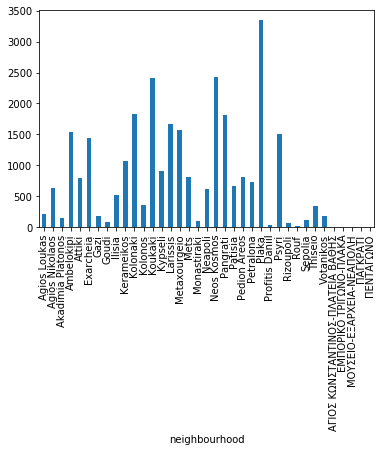

In [10]:
#6
graph = df.groupby(by='neighbourhood').size()
graph.plot.bar(y='Count',x='Neighbourhoods')

In [30]:
#7
temp = df[['room_type','neighbourhood','host_id']]
temp.dropna(inplace=True)
temp.drop_duplicates(subset='host_id',inplace=True)
temp = temp.groupby(['neighbourhood','room_type']).size().sort_values(ascending=False)
temp


neighbourhood           room_type      
Plaka                   Entire home/apt    442
Neos Kosmos             Entire home/apt    441
Koukaki                 Entire home/apt    423
Kolonaki                Entire home/apt    370
Ambelokipi              Entire home/apt    359
                                          ... 
Larissis                Shared room          1
Ambelokipi              Shared room          1
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  Entire home/apt      1
Profitis Daniil         Shared room          1
Monastiraki             Private room         1
Length: 81, dtype: int64

In [34]:
# 8
tempdf = df[['room_type','host_id','price']]
# tempdf.dropna(inpl)
tempdf.drop_duplicates(subset='host_id',inplace=True)
tempdf.groupby(by=['room_type'],as_index=False).agg({'price':'mean'}).sort_values(['price'],ascending=False,ignore_index=True).style.hide_index()

room_type,price
Entire home/apt,55.267158
Private room,54.511482
Shared room,24.083333


In [49]:
# 9
latitude = []
longitude = []
tempdf = df[['latitude','longitude','host_id','price','bed_type','room_type']]
tempdf.drop_duplicates(subset='host_id',inplace=True)
latitude = tempdf['latitude'].tolist()
longitude = tempdf['longitude'].tolist()
price = tempdf['price'].tolist()
btype = tempdf['bed_type'].tolist()
rtype = tempdf['room_type'].tolist()

tooltip = 'Click me!'

m = fl.Map(location=[latitude[0],longitude[0]], zoom_start=12,tiles='Stamen Terrain')

for i, j in zip(range(1,100),range(1,100)):
    fl.Marker(location=[latitude[i], longitude[j]], icon=fl.Icon(color='red', icon='info-sign'),tooltip=tooltip,popup=('$'+str(price[i])+'\n'+str(rtype[i])+'\n'+str(btype[i]))).add_to(m)
m



In [66]:
# 10

text = df['neighbourhood']
text = text.tolist()

# wordcloud2 = WordCloud().generate(' '.join(df['neighbourhood']))
# wordcloud.generate_from_frequencies(frequencies=dict(tuples))

# plt.figure(figsize=(10,10))
# plt.imshow(data,interpolation='bilinear')
# plt.axis("off")
# plt.show()



a', 'Ambelokipi', 'Pedion Areos', 'Ilisia', 'Metaxourgeio', 'Metaxourgeio', 'Metaxourgeio', 'Metaxourgeio', 'Plaka', 'Plaka', 'Koukaki', 'Neos Kosmos', 'Pangrati', 'Petralona', 'Ilisia', 'Petralona', 'Neos Kosmos', 'Kolonaki', 'Ambelokipi', 'Petralona', 'Neos Kosmos', 'Neos Kosmos', 'Koukaki', 'Pedion Areos', 'Psyri', 'Plaka', 'Pedion Areos', 'Plaka', 'Pedion Areos', 'Attiki', 'Mets', 'Goudi', 'Plaka', 'Attiki', 'Kerameikos', 'Plaka', 'Ambelokipi', 'Kolonaki', 'Larissis', 'Ambelokipi', 'Koukaki', 'Agios Nikolaos', 'Neos Kosmos', 'Neos Kosmos', 'Pangrati', 'Plaka', 'Goudi', 'Pangrati', 'Goudi', 'Larissis', 'Goudi', 'Pangrati', 'Exarcheia', 'Pedion Areos', 'Pedion Areos', 'Plaka', 'Neos Kosmos', 'Ambelokipi', 'Larissis', 'Metaxourgeio', 'Larissis', 'Kolonaki', 'Ilisia', 'Kypseli', 'Kerameikos', 'Attiki', 'Koukaki', 'Neos Kosmos', 'Akadimia Platonos', 'Plaka', 'Koukaki', 'Neapoli', 'Larissis', 'Ambelokipi', 'Exarcheia', 'Koukaki', 'Psyri', 'Attiki', 'Thiseio', 'Pangrati', 'Pedion Areos', 